<a href="https://colab.research.google.com/github/AdindaFz/Clustering-Analysis-of-Student-Depression-Using-Machine-Learning/blob/main/Clustering_Analysis_of_Student_Depression_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

      Datasest diambil dari kaggle : [Sumber Dataset](https://www.kaggle.com/datasets/ikynahidwin/depression-student-dataset)
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy import stats
from sklearn.model_selection import ParameterGrid

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Data/Student_Depression_Dataset.csv'
df = pd.read_csv(file_path)

df.head()

Mounted at /content/drive


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
#Struktur data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [ ]:
# Menangani data yang hilang
missing_values = df.isnull().sum()
print("Missing values before dropping rows:\n", missing_values[missing_values > 0])

# Drop rows with any missing values
df.dropna(inplace=True)

# Verify if missing values have been removed
missing_values_after_drop = df.isnull().sum()
print("\nMissing values after dropping rows:\n", missing_values_after_drop[missing_values_after_drop > 0])

Missing values before dropping rows:
 Financial Stress    3
dtype: int64

Missing values after dropping rows:
 Series([], dtype: int64)


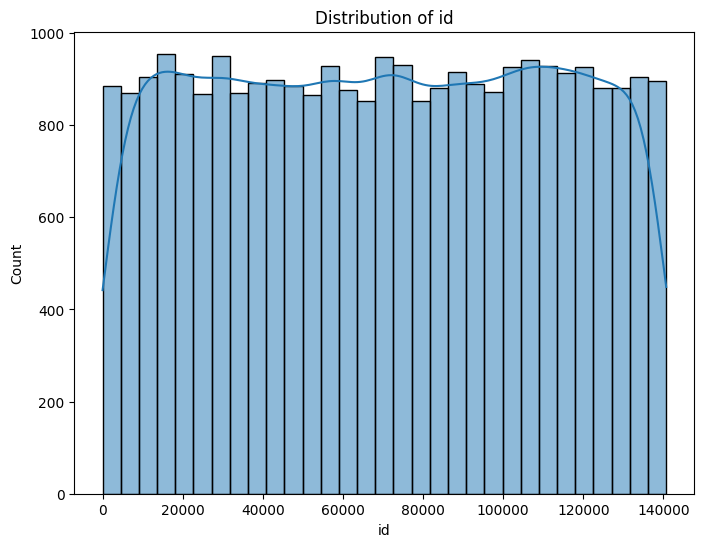

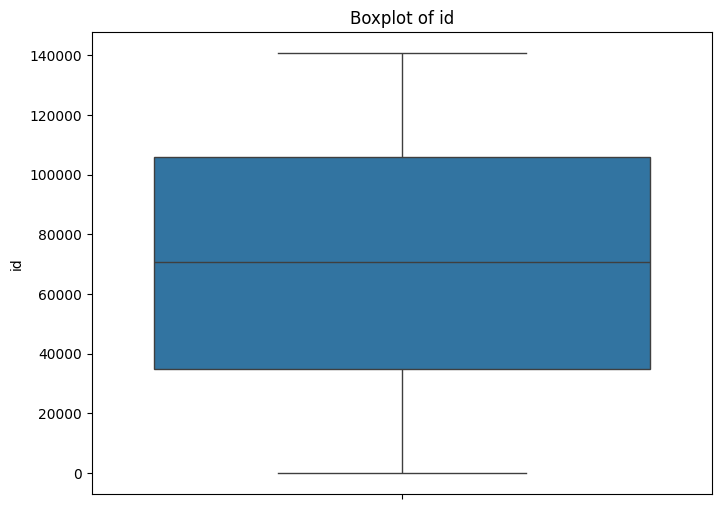

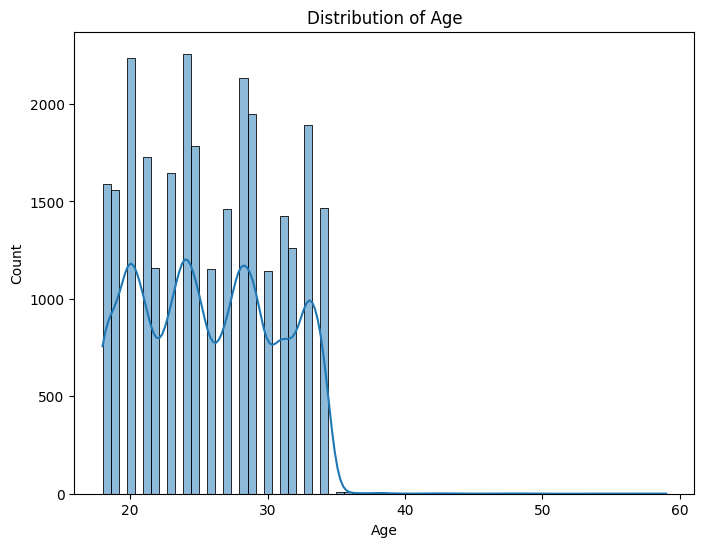

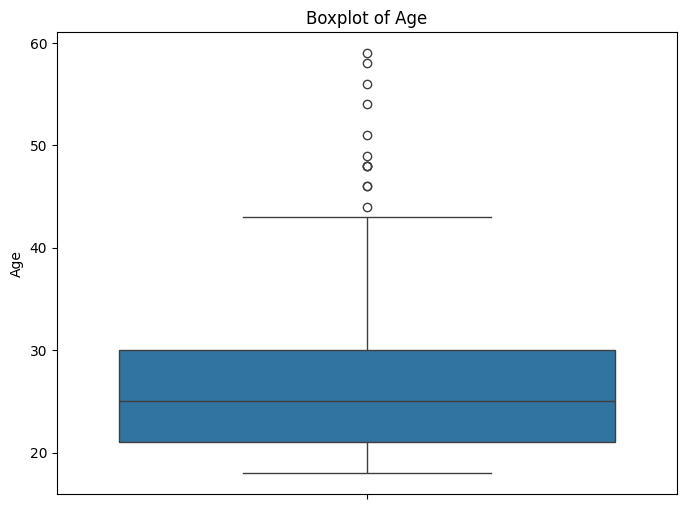

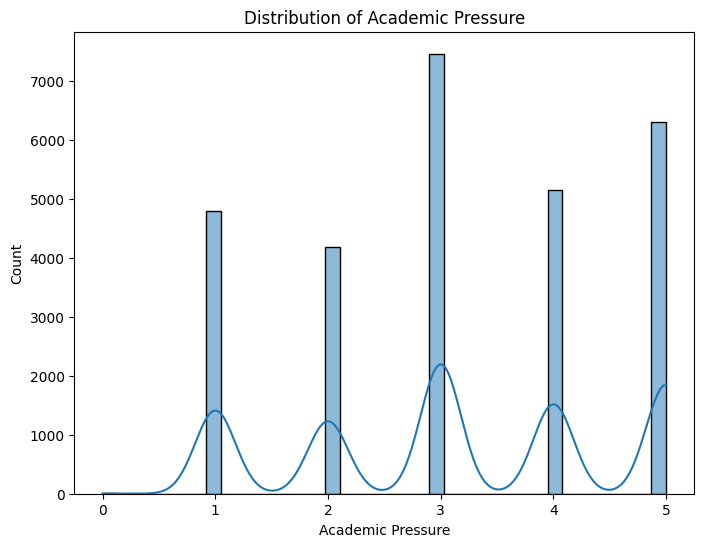

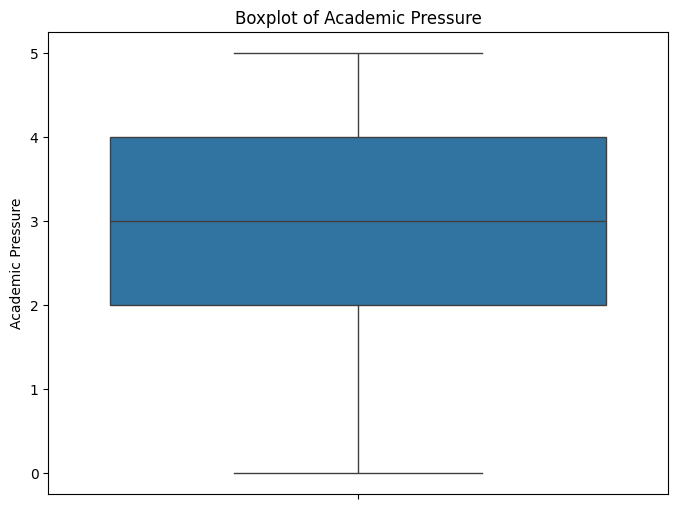

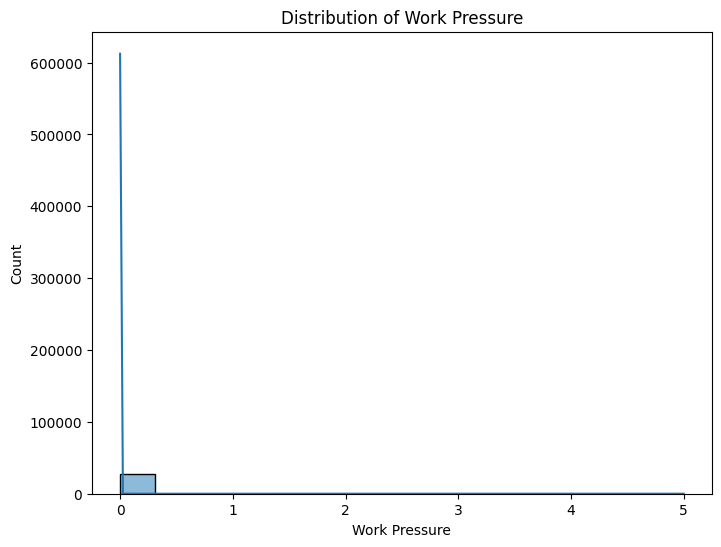

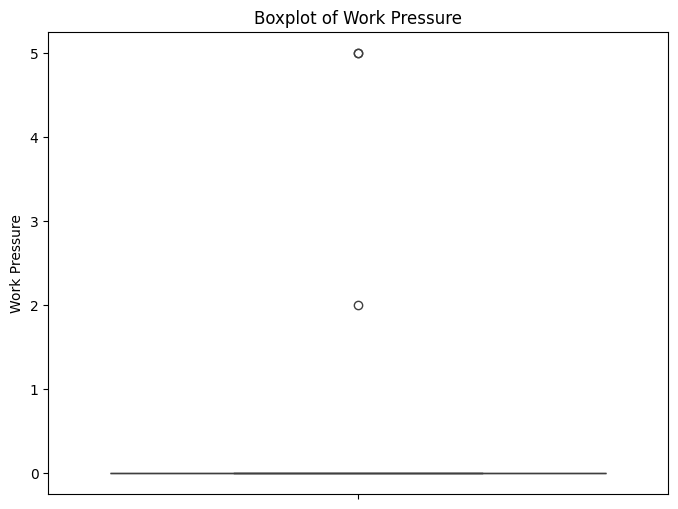

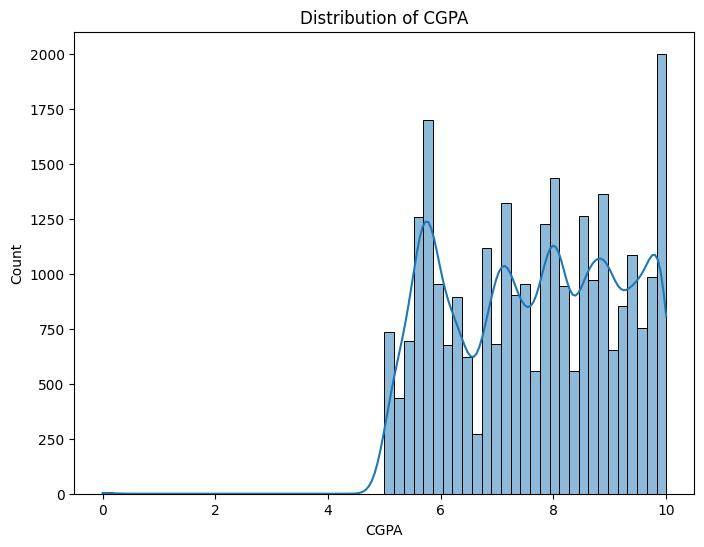

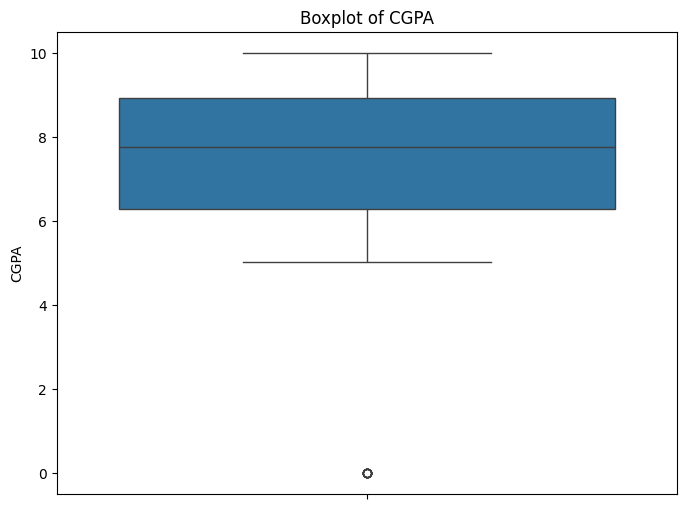

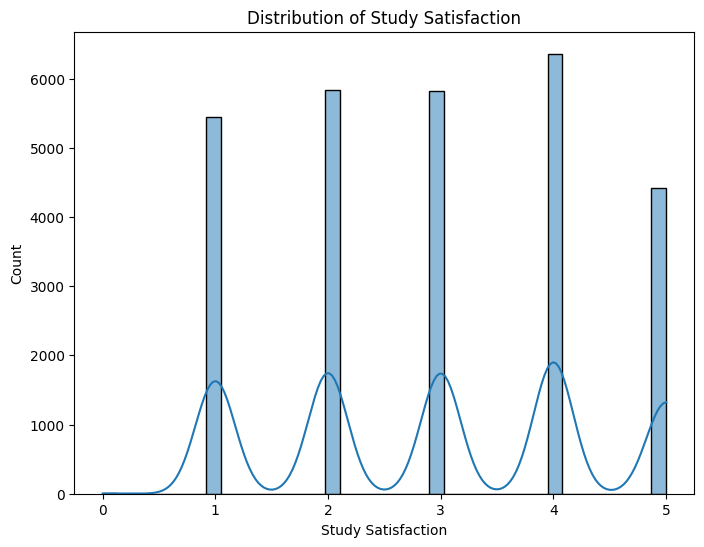

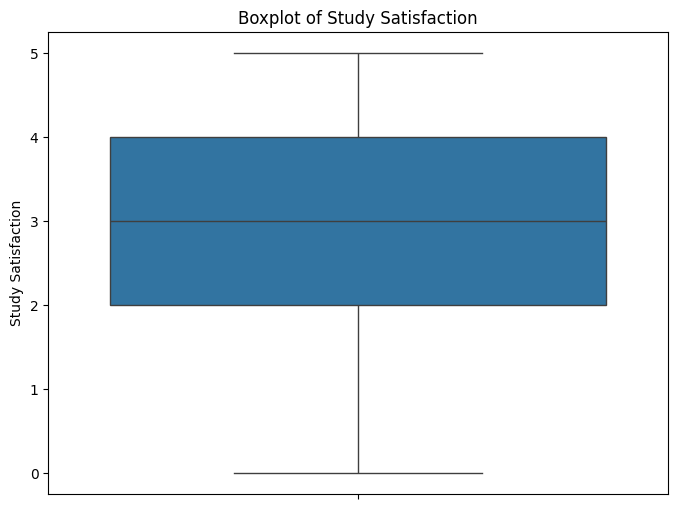

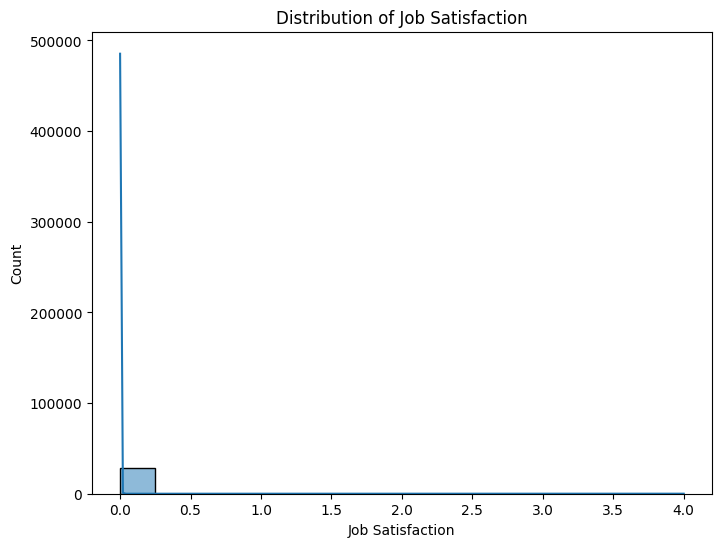

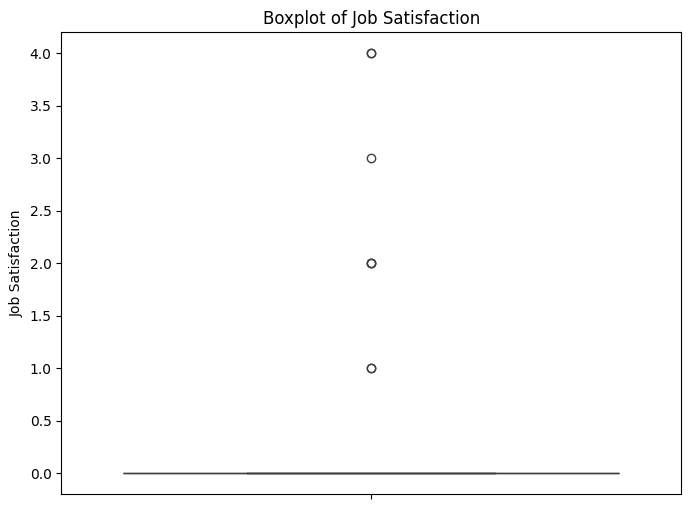

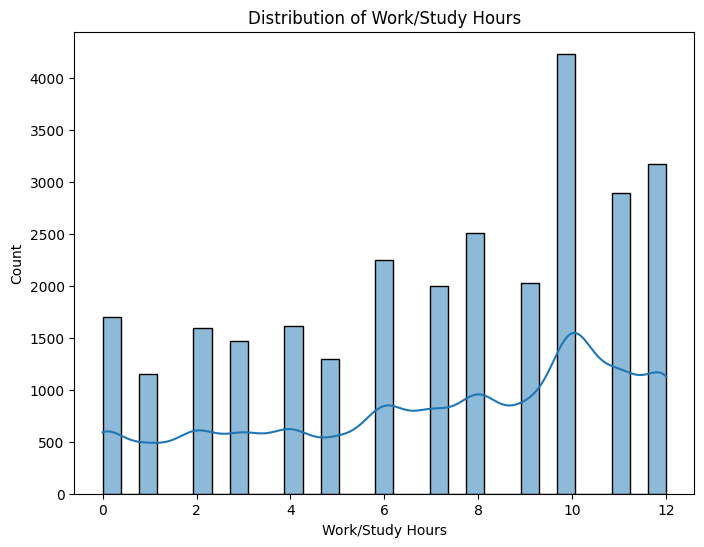

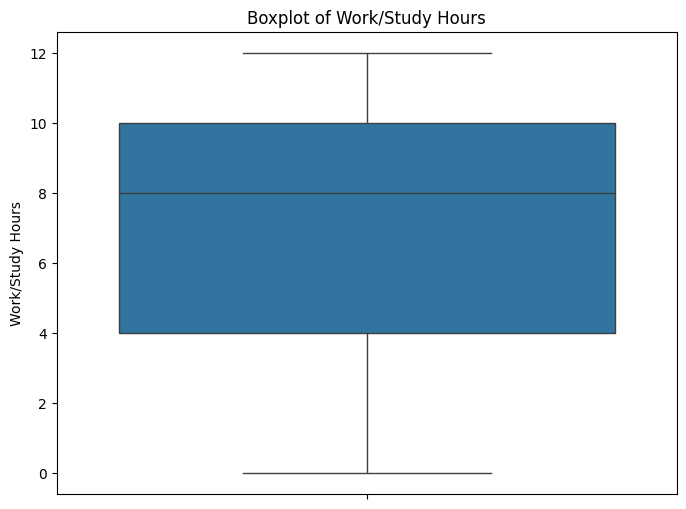

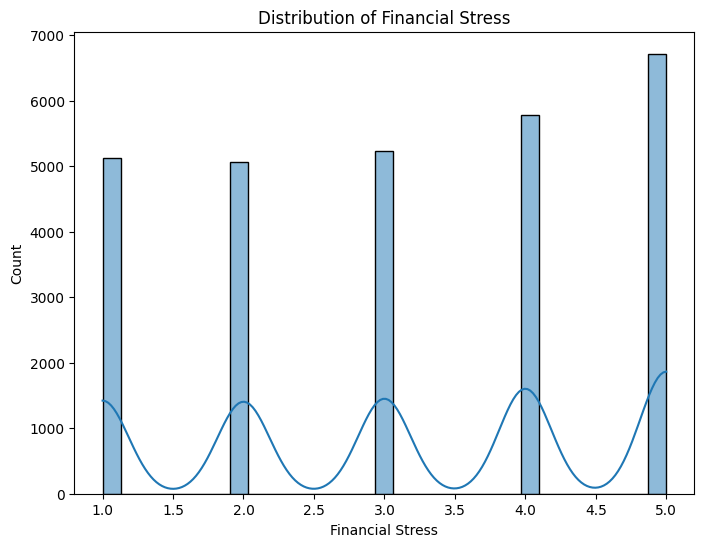

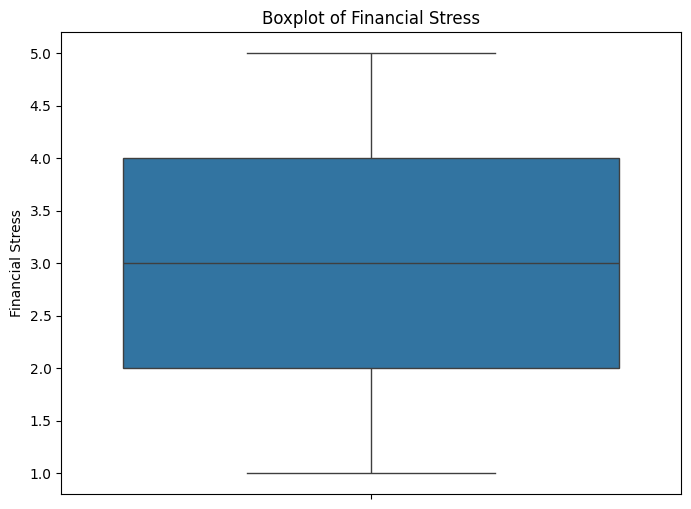

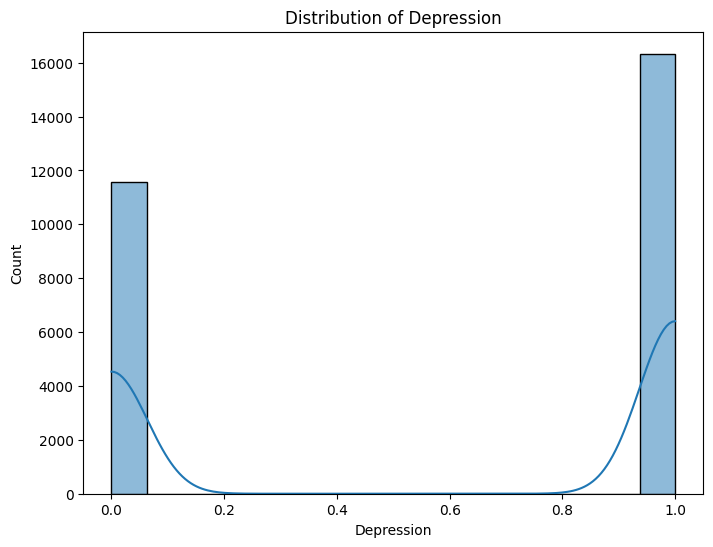

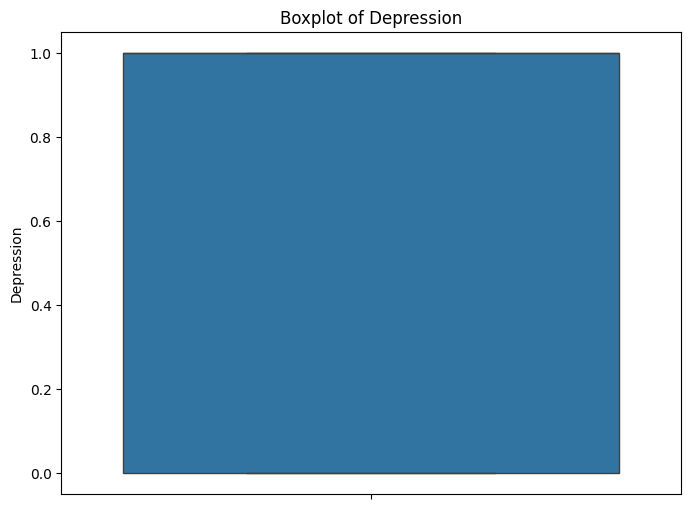

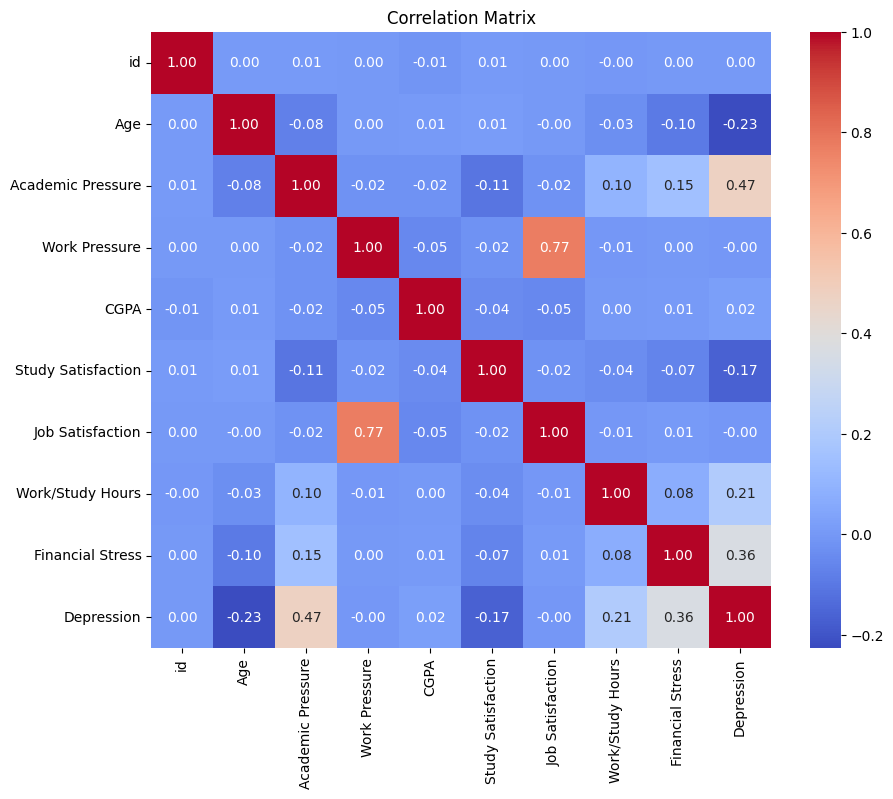

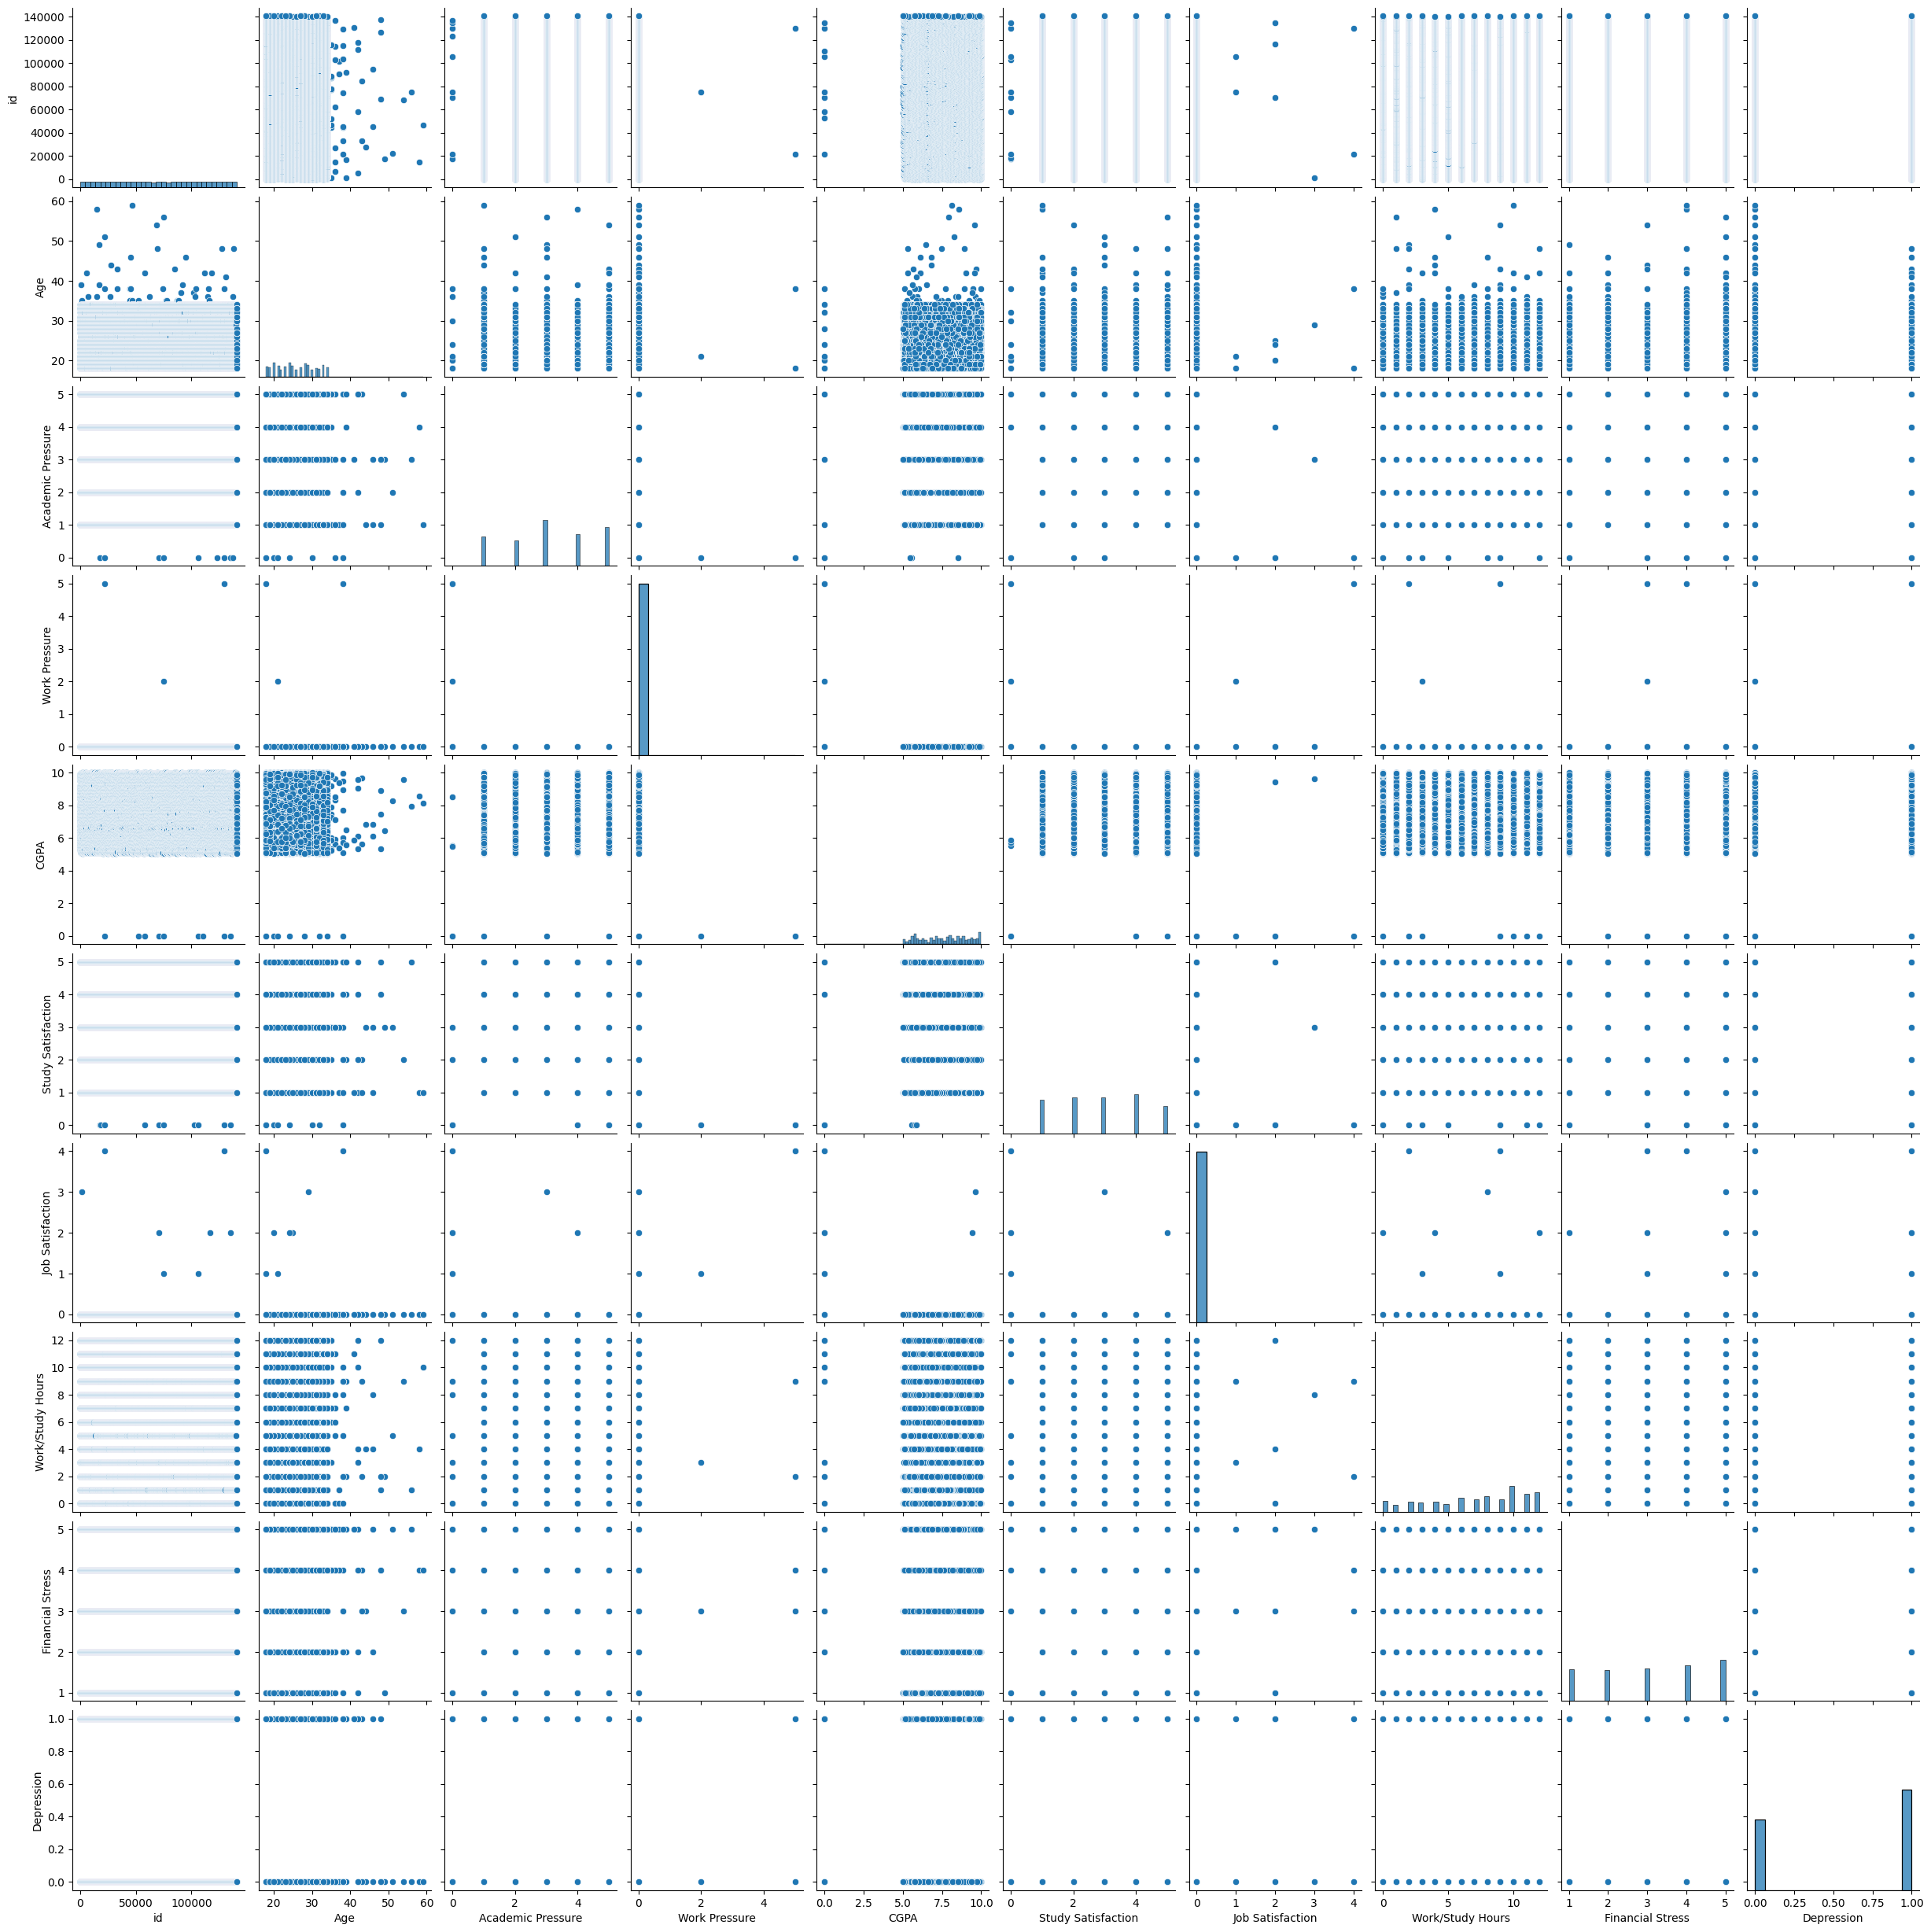

In [ ]:
# Analisis Distribusi dan Korelasi

# Analisis distribusi variabel numerik
numerical_features = df.select_dtypes(include=np.number)
for col in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Matriks Korelasi
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Scatter plot untuk beberapa pasang variabel
sns.pairplot(numerical_features)
plt.show()

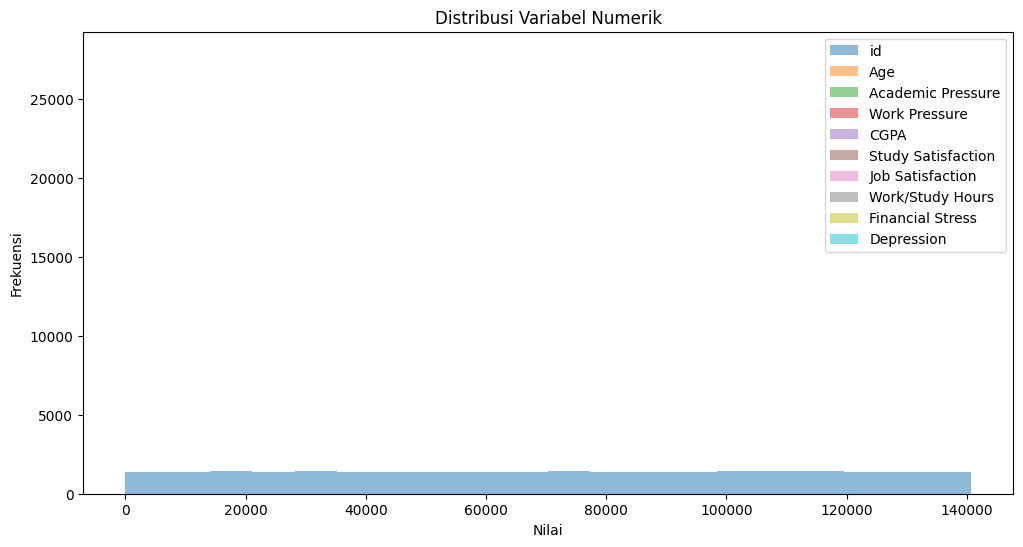

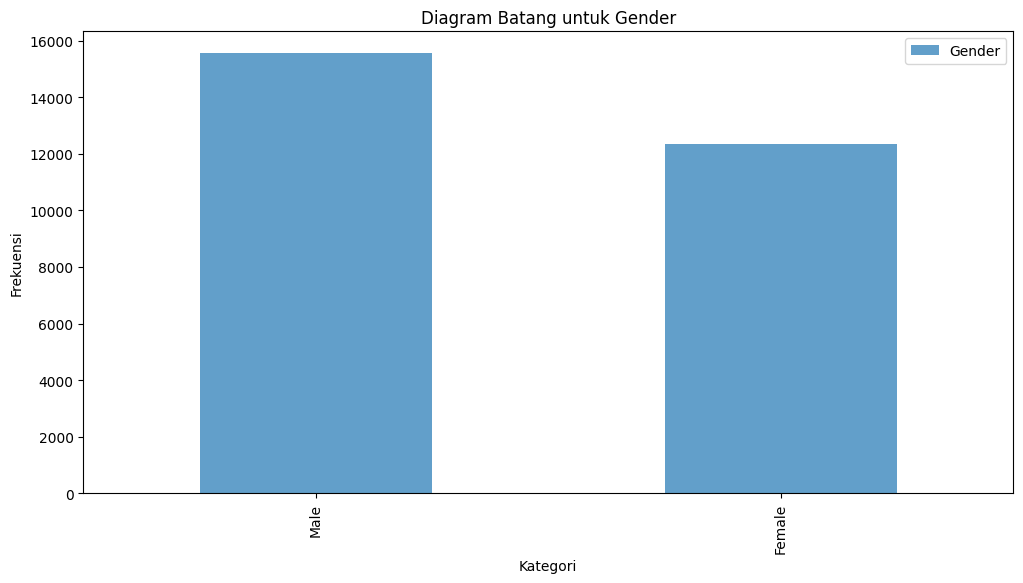

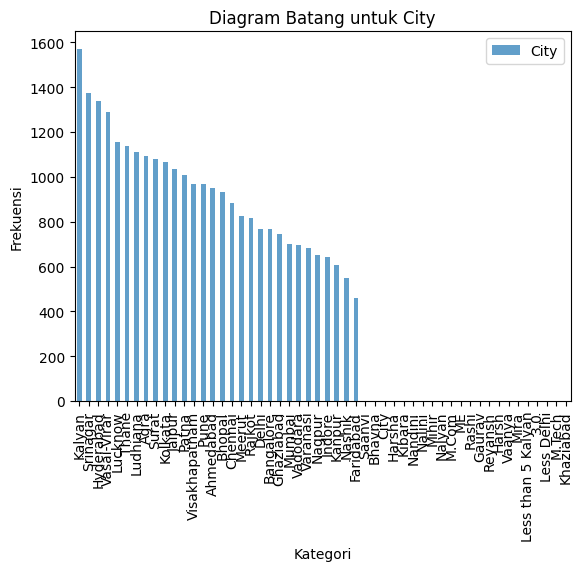

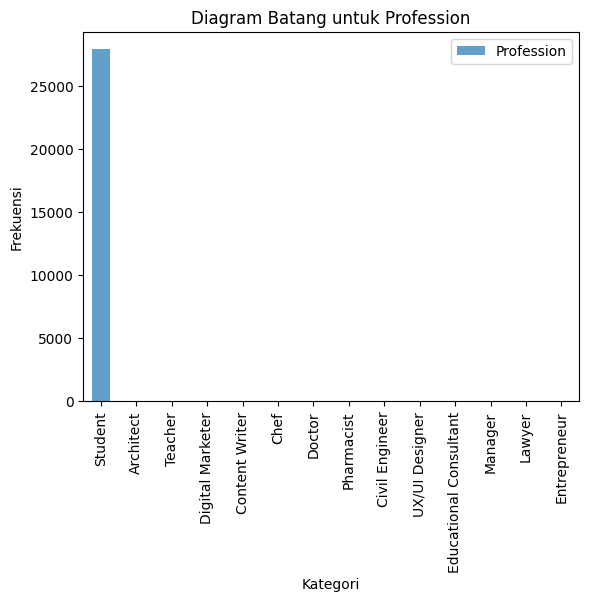

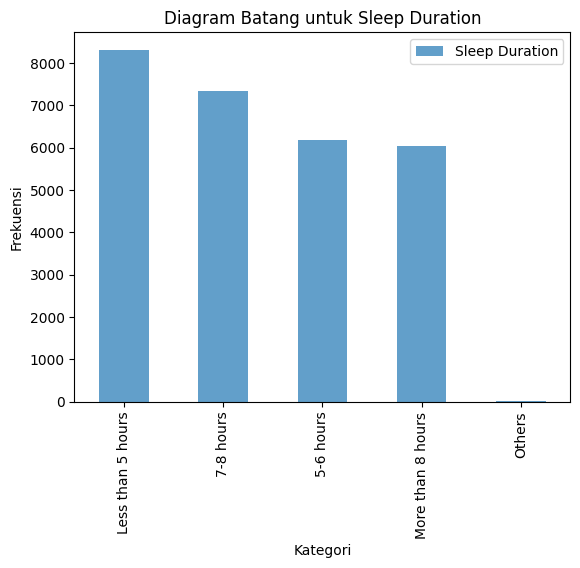

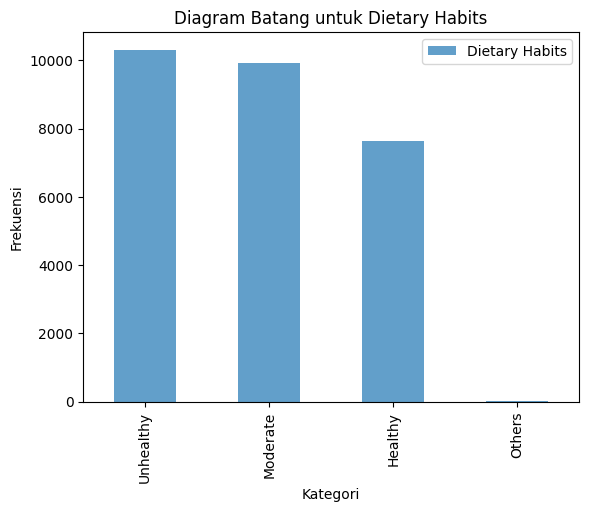

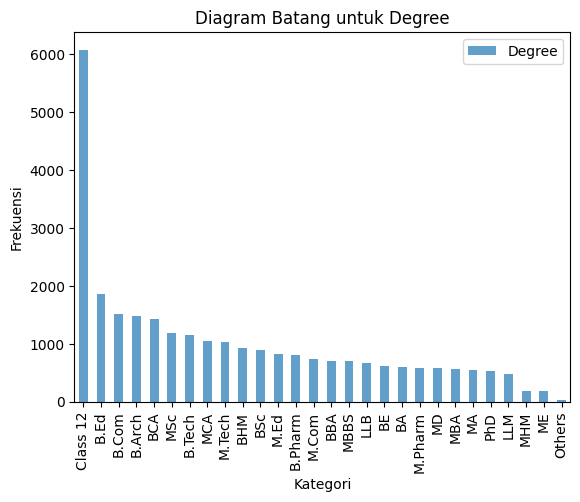

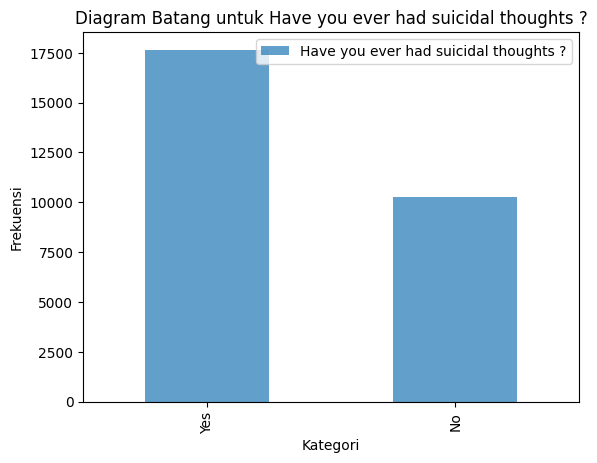

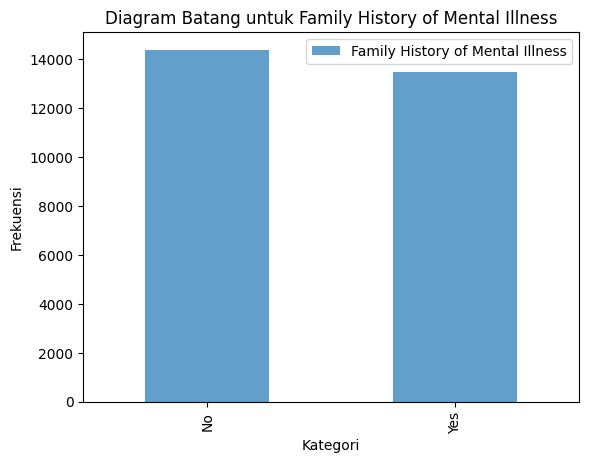

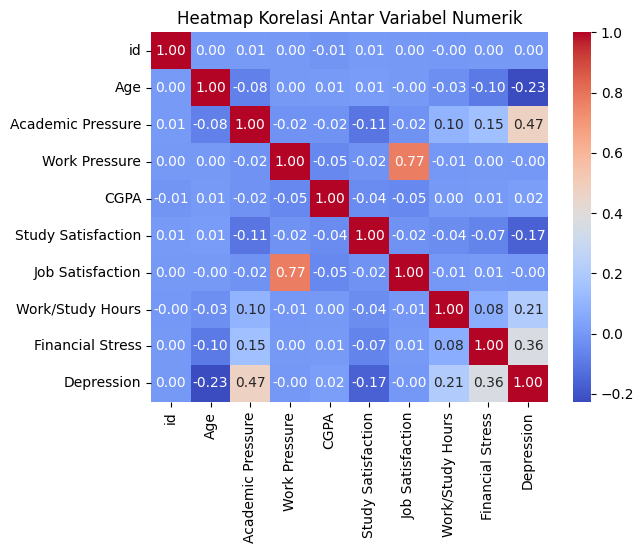

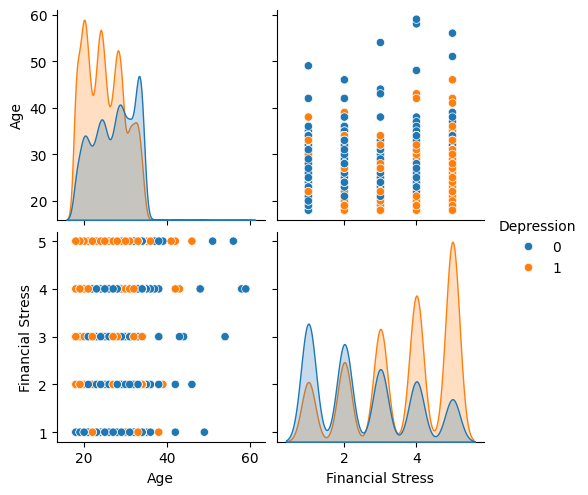

In [ ]:
# Visualisasi Data

# Visualisasi distribusi untuk variabel numerik
plt.figure(figsize=(12, 6))
for column in df.select_dtypes(include=np.number):
    plt.hist(df[column], bins=20, alpha=0.5, label=column)
plt.title('Distribusi Variabel Numerik')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

# Diagram batang untuk variabel kategorikal
plt.figure(figsize=(12, 6))
for column in df.select_dtypes(include='object'):
    df[column].value_counts().plot(kind='bar', alpha=0.7, label=column)
    plt.title(f'Diagram Batang untuk {column}')
    plt.xlabel('Kategori')
    plt.ylabel('Frekuensi')
    plt.legend()
    plt.show()


# Heatmap untuk korelasi antar variabel numerik
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

# Pairplot untuk beberapa variabel (pilih variabel yang relevan)
sns.pairplot(df[['Age', 'Gender', 'Sleep Duration', 'Dietary Habits', 'Financial Stress', 'Depression']], hue='Depression', diag_kind='kde')  # Ganti dengan variabel yang diinginkan
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# Encoding Categorical Features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
# Standardize Data
scaler = MinMaxScaler()
X_all = scaler.fit_transform(df)  # Semua fitur

In [ ]:
# Outlier Detection and Removal (IQR)
Q1 = np.percentile(X_all, 25, axis=0)
Q3 = np.percentile(X_all, 75, axis=0)
IQR = Q3 - Q1

outlier_indices = np.where((X_all < (Q1 - 1.5 * IQR)) | (X_all > (Q3 + 1.5 * IQR)))[0]
X_filtered = np.delete(X_all, outlier_indices, axis=0)

print(f"Jumlah outlier (IQR): {len(outlier_indices)}")

print(f"Jumlah outlier (Z-score): {len(outlier_indices)}")
X_filtered = np.delete(X_all, outlier_indices, axis=0)

Jumlah outlier (IQR): 81
Jumlah outlier (Z-score): 81


In [ ]:
# Dimensionality Reduction (PCA)
def apply_pca(data):
    pca = PCA(n_components=2)
    return pca.fit_transform(data)

X_all_pca = apply_pca(X_all)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

--- Silhouette Scores with All Features ---


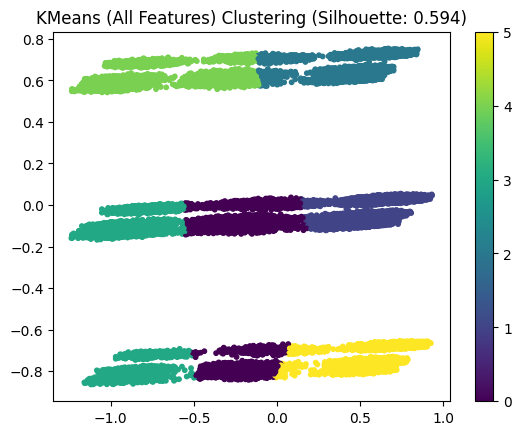

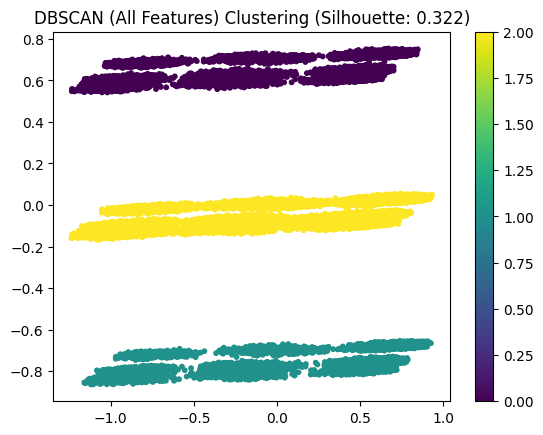

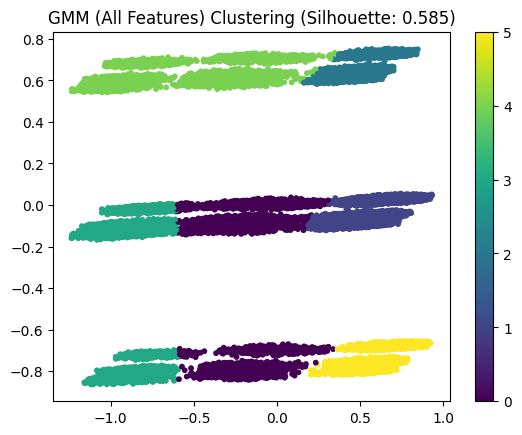

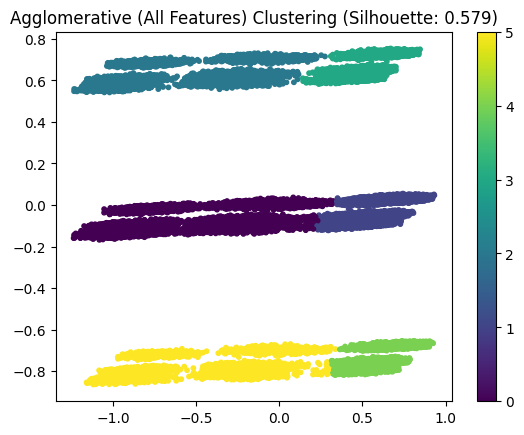

           Model  All Features
0         KMeans      0.594231
1         DBSCAN      0.321990
2            GMM      0.585401
3  Agglomerative      0.578859


In [ ]:
# Clustering Models
def clustering_and_evaluate(X, model, name):
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(f'{name} Clustering (Silhouette: {silhouette:.3f})')
    plt.colorbar()
    plt.show()
    return silhouette

# Results
print('--- Silhouette Scores with All Features ---')
kmeans_all = clustering_and_evaluate(X_all_pca, KMeans(n_clusters=6, random_state=0), "KMeans (All Features)")
dbscan_all = clustering_and_evaluate(X_all_pca, DBSCAN(eps=0.5, min_samples=5), "DBSCAN (All Features)")
gmm_all = clustering_and_evaluate(X_all_pca, GaussianMixture(n_components=6, random_state=0), "GMM (All Features)")
agg_all = clustering_and_evaluate(X_all_pca, AgglomerativeClustering(n_clusters=6), "Agglomerative (All Features)")

# Display Final Results
results = pd.DataFrame({
    'Model': ['KMeans', 'DBSCAN', 'GMM', 'Agglomerative'],
    'All Features': [kmeans_all, dbscan_all, gmm_all, agg_all],
})
print(results)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
for eps in np.arange(0.5, 1, 0.1):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_all_pca)
    score = silhouette_score(X_all_pca, labels) if len(set(labels)) > 1 else -1
    print(f'DBSCAN eps={eps:.1f}, Silhouette Score: {score:.3f}')

DBSCAN eps=0.5, Silhouette Score: 0.322
DBSCAN eps=0.6, Silhouette Score: -1.000
DBSCAN eps=0.7, Silhouette Score: -1.000
DBSCAN eps=0.8, Silhouette Score: -1.000
DBSCAN eps=0.9, Silhouette Score: -1.000


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# Feature Selection
selected_features = ['Sleep Duration', 'Work/Study Hours',
                     'Financial Stress', 'Family History of Mental Illness',
                     'Have you ever had suicidal thoughts ?']

# Standardize Data
scaler = MinMaxScaler()
X_selected = scaler.fit_transform(df[selected_features])  # Fitur terpilih

# Outlier Detection and Removal (IQR)
Q1 = np.percentile(X_all, 25, axis=0)
Q3 = np.percentile(X_all, 75, axis=0)
IQR = Q3 - Q1

outlier_indices = np.where((X_all < (Q1 - 1.5 * IQR)) | (X_all > (Q3 + 1.5 * IQR)))[0]
X_filtered = np.delete(X_selected, outlier_indices, axis=0)

print(f"Jumlah outlier (IQR): {len(outlier_indices)}")

print(f"Jumlah outlier (Z-score): {len(outlier_indices)}")
X_filtered = np.delete(X_selected, outlier_indices, axis=0)

# Dimensionality Reduction (PCA)
def apply_pca(data):
    pca = PCA(n_components=2)
    return pca.fit_transform(data)

X_selected_pca = apply_pca(X_filtered)

Jumlah outlier (IQR): 81
Jumlah outlier (Z-score): 81


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

--- Silhouette Scores with All Features ---


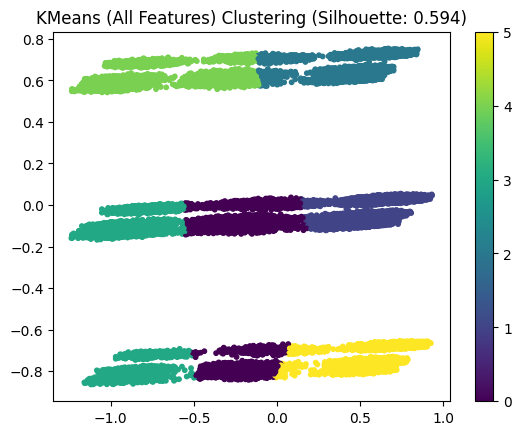

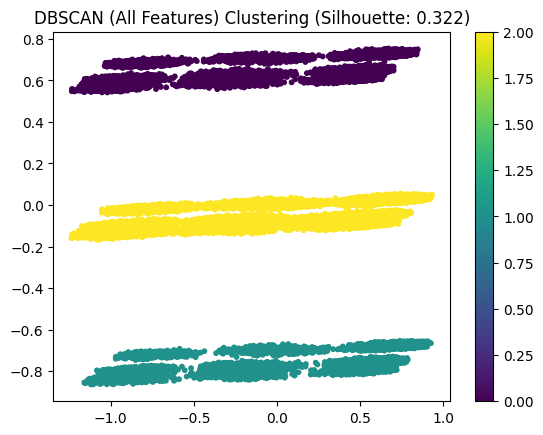

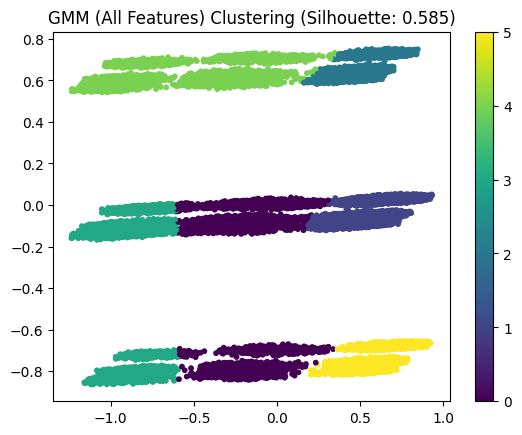

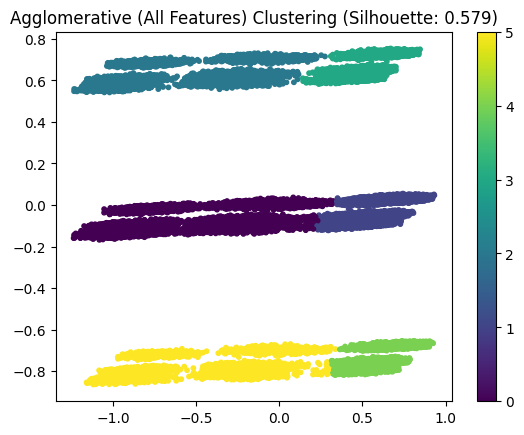

--- Silhouette Scores with Selected Features ---


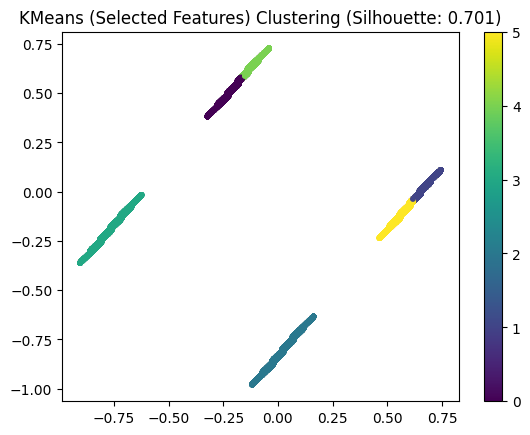

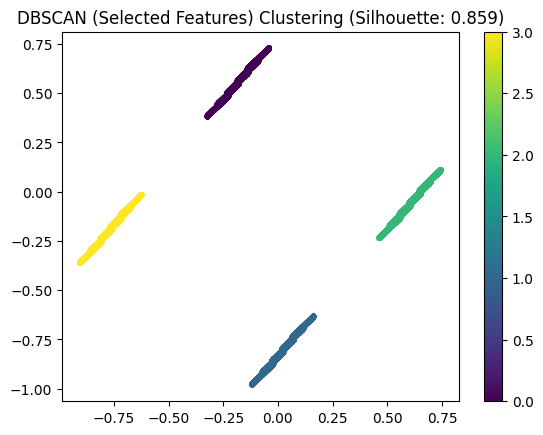

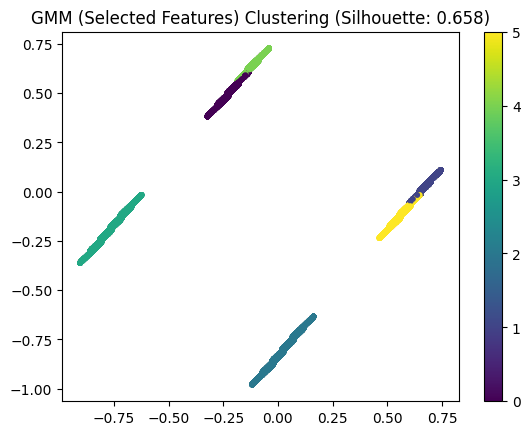

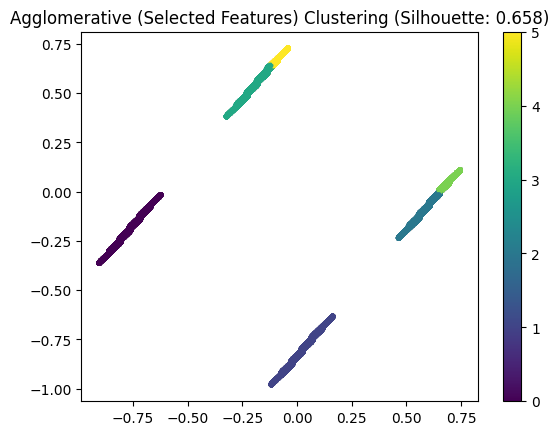

           Model  All Features  Selected Features
0         KMeans      0.594231           0.700589
1         DBSCAN      0.321990           0.858833
2            GMM      0.585401           0.657791
3  Agglomerative      0.578859           0.658046


In [ ]:
# Clustering Models
def clustering_and_evaluate(X, model, name):
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(f'{name} Clustering (Silhouette: {silhouette:.3f})')
    plt.colorbar()
    plt.show()
    return silhouette, labels # Return labels as well

# Compare Results
print('--- Silhouette Scores with All Features ---')
kmeans_all, _ = clustering_and_evaluate(X_all_pca, KMeans(n_clusters=6, random_state=0), "KMeans (All Features)") # Ignore labels for KMeans
dbscan_all, _ = clustering_and_evaluate(X_all_pca, DBSCAN(eps=0.5, min_samples=5), "DBSCAN (All Features)") # Ignore labels for DBSCAN
gmm_all, _ = clustering_and_evaluate(X_all_pca, GaussianMixture(n_components=6, random_state=0), "GMM (All Features)") # Ignore labels for GMM
agg_all, _ = clustering_and_evaluate(X_all_pca, AgglomerativeClustering(n_clusters=6), "Agglomerative (All Features)") # Ignore labels for Agglomerative

print('--- Silhouette Scores with Selected Features ---')
kmeans_selected, _ = clustering_and_evaluate(X_selected_pca, KMeans(n_clusters=6, random_state=0), "KMeans (Selected Features)") # Ignore labels for KMeans
dbscan_selected, dbscan_labels = clustering_and_evaluate(X_selected_pca, DBSCAN(eps=0.5, min_samples=5), "DBSCAN (Selected Features)") # Capture labels for DBSCAN
gmm_selected, _ = clustering_and_evaluate(X_selected_pca, GaussianMixture(n_components=6, random_state=0), "GMM (Selected Features)") # Ignore labels for GMM
agg_selected, _ = clustering_and_evaluate(X_selected_pca, AgglomerativeClustering(n_clusters=6), "Agglomerative (Selected Features)") # Ignore labels for Agglomerative

# Display Final Results
results = pd.DataFrame({
    'Model': ['KMeans', 'DBSCAN', 'GMM', 'Agglomerative'],
    'All Features': [kmeans_all, dbscan_all, gmm_all, agg_all],
    'Selected Features': [kmeans_selected, dbscan_selected, gmm_selected, agg_selected]
})
print(results)

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

DBSCAN menghasilkan 4 cluster.


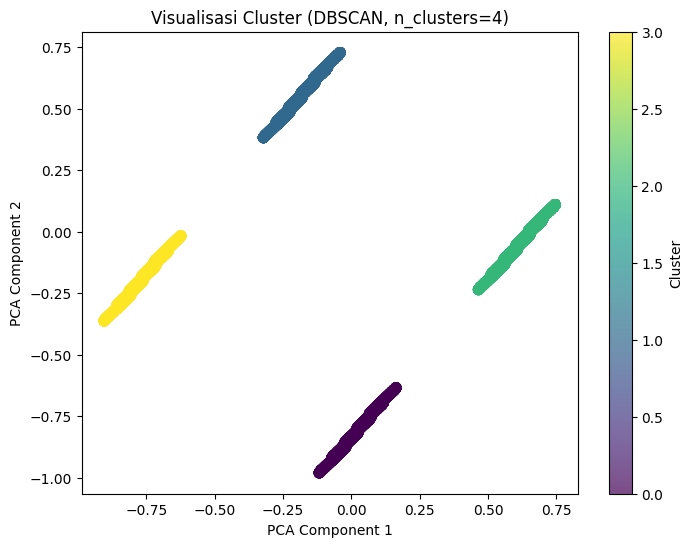


--- Analisis Karakteristik Cluster (DBSCAN) ---

Cluster 0:
- Rata-rata Sleep Duration: 1.49
- Rata-rata Work/Study Hours: 7.46
- Rata-rata Financial Stress: 3.35
- Rata-rata Family History of Mental Illness: 0.00
- Rata-rata Have you ever had suicidal thoughts ?: 1.00

Analisis:
Cluster 0 menunjukkan karakteristik rata-rata seperti yang tercantum di atas.
--------------------------------------------------
Cluster 1:
- Rata-rata Sleep Duration: 1.54
- Rata-rata Work/Study Hours: 6.64
- Rata-rata Financial Stress: 2.73
- Rata-rata Family History of Mental Illness: 1.00
- Rata-rata Have you ever had suicidal thoughts ?: 0.00

Analisis:
Cluster 1 menunjukkan karakteristik rata-rata seperti yang tercantum di atas.
--------------------------------------------------
Cluster 2:
- Rata-rata Sleep Duration: 1.50
- Rata-rata Work/Study Hours: 7.55
- Rata-rata Financial Stress: 3.38
- Rata-rata Family History of Mental Illness: 1.00
- Rata-rata Have you ever had suicidal thoughts ?: 1.00

Analis

,Sleep Duration,Work/Study Hours,Financial Stress,Family History of Mental Illness,Have you ever had suicidal thoughts ?
Cluster,,,,,
0,1.488951,7.455749,3.354795,0.0,1.0
1,1.535722,6.635659,2.731406,1.0,0.0
2,1.496722,7.550213,3.383297,1.0,1.0
3,1.542516,6.505234,2.755188,0.0,0.0


In [ ]:
def analyze_clusters(df_original, labels, model_name, outlier_indices):
    """
    Analyzes cluster characteristics.

    Args:
        df_original (pd.DataFrame): The original DataFrame.
        labels (np.ndarray): Cluster labels.
        model_name (str): Name of the clustering model.
        outlier_indices (np.ndarray): Indices of outlier data points.

    Returns:
        pd.DataFrame: Cluster analysis results.
    """

    # Create a new DataFrame to avoid modifying the original
    df_clustered = df_original.drop(index=df_original.index[outlier_indices]) # Drop outlier rows
    df_clustered['Cluster'] = labels
    cluster_analysis = df_clustered.groupby('Cluster').mean()

    print(f"\n--- Analisis Karakteristik Cluster ({model_name}) ---\n")
    for cluster, stats in cluster_analysis.iterrows():
        print(f"Cluster {cluster}:")
        for col in stats.index:
            print(f"- Rata-rata {col}: {stats[col]:.2f}")
        print("\nAnalisis:")
        print(f"Cluster {cluster} menunjukkan karakteristik rata-rata seperti yang tercantum di atas.")
        print("-" * 50)

    return cluster_analysis
def plot_clusters(X, labels, centroids=None, title="Visualisasi Cluster"):
    plt.figure(figsize=(8, 6))

    # Update: Fit KMeans to the current data and predict labels
    # to ensure they match the data size
    kmeans_plot = KMeans(n_clusters=len(np.unique(labels)), random_state=0)
    labels = kmeans_plot.fit_predict(X)  # Assign labels to the plotted data

    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, label='Centroids', marker='X')
        for idx, centroid in enumerate(centroids):
            plt.text(centroid[0], centroid[1], f"Centroid {idx+1}", color="red", fontsize=12, ha='center')
    plt.colorbar(scatter, label="Cluster")
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    if centroids is not None:
        plt.legend()
    plt.show()

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

# DBSCAN Clustering with Selected Features
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X_selected_pca)

# Filter both data and labels to exclude outliers BEFORE visualization and analysis
filtered_indices = ~np.isin(np.arange(len(X_selected_pca)), outlier_indices)
X_selected_pca_filtered = X_selected_pca[filtered_indices]
dbscan_labels_filtered = dbscan_labels[filtered_indices]

n_clusters_dbscan = len(set(dbscan_labels_filtered)) - (1 if -1 in dbscan_labels_filtered else 0)
print(f"DBSCAN menghasilkan {n_clusters_dbscan} cluster.")

# Visualisasi dan analisis untuk DBSCAN with filtered data and labels
plot_clusters(X_selected_pca_filtered, dbscan_labels_filtered, title=f"Visualisasi Cluster (DBSCAN, n_clusters={n_clusters_dbscan})")
analyze_clusters(df[selected_features], dbscan_labels, "DBSCAN", outlier_indices) # Pass original dbscan_labels and outlier_indices

Distribusi Cluster:
Cluster Label
Tingkat Stres Tinggi dengan Pola Tidur Buruk             8915
Tingkat Stres Tinggi dengan Gaya Hidup Tidak Seimbang    8693
Tingkat Stres Rendah dengan Gaya Hidup Sehat             5445
Tingkat Stres Rendah dengan Pola Tidur Cukup Baik        4773
Name: count, dtype: int64


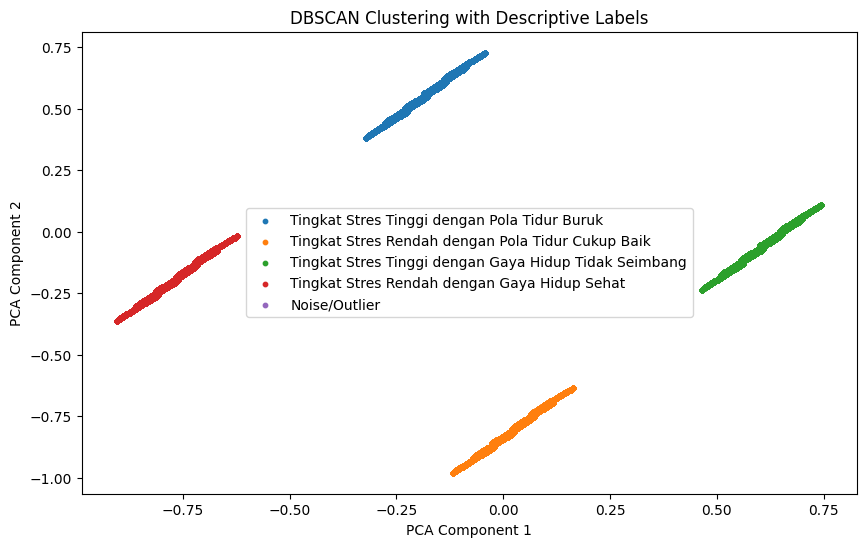

In [ ]:
# DBSCAN Clustering dengan Selected Features
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
# Apply DBSCAN to X_selected_pca directly
dbscan_labels = dbscan_model.fit_predict(X_selected_pca)

# Buat DataFrame Hasil Clustering
# Because we used X_selected_pca, need to filter df to match
filtered_indices = ~np.isin(np.arange(len(df)), outlier_indices)
df['Cluster'] = np.nan # Initialize the 'Cluster' column with NaN
df.loc[filtered_indices, 'Cluster'] = dbscan_labels  # Assign cluster labels using .loc

# Berikan Label Deskriptif untuk Setiap Cluster
# Pastikan label ini sesuai dengan analisis karakteristik cluster Anda
cluster_labels = {
    0: "Tingkat Stres Tinggi dengan Pola Tidur Buruk",
    1: "Tingkat Stres Rendah dengan Pola Tidur Cukup Baik",
    2: "Tingkat Stres Tinggi dengan Gaya Hidup Tidak Seimbang",
    3: "Tingkat Stres Rendah dengan Gaya Hidup Sehat",
    -1: "Noise/Outlier"  # Label default untuk noise (outlier)
}

# Tambahkan kolom label deskriptif ke DataFrame using .loc
df.loc[filtered_indices, 'Cluster Label'] = df.loc[filtered_indices, 'Cluster'].map(cluster_labels)

# Tampilkan Distribusi Cluster
print("Distribusi Cluster:")
print(df['Cluster Label'].value_counts())

# Visualisasi Hasil Clustering dengan Label
plt.figure(figsize=(10, 6))
for cluster, label in cluster_labels.items():
    cluster_data = X_selected_pca[dbscan_labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=label, s=10)

plt.title("DBSCAN Clustering with Descriptive Labels")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

DBSCAN menghasilkan 4 cluster.

### **Cluster 0: "Tingkat Stres Tinggi dengan Pola Tidur Buruk"**
*   Rata-rata Sleep Duration: 1.49 (cukup rendah dibandingkan cluster lain).
*   Rata-rata Work/Study Hours: 7.45 (cukup tinggi).
*   Rata-rata Financial Stress: 3.36 (tinggi).
*   Rata-rata Family History of Mental Illness: 0.00 (tidak memiliki riwayat keluarga dengan gangguan mental).
*   Rata-rata Have you ever had suicidal thoughts?: 1.00 (selalu memiliki pikiran bunuh diri).


Mahasiswa di cluster ini memiliki rata-rata durasi tidur yang buruk, yaitu hanya 1.49 unit waktu, lebih rendah dari cluster lainnya.
Kombinasi tingkat stres finansial yang tinggi (3.36) dan jam kerja/studi yang panjang (7.45 jam) menunjukkan bahwa mahasiswa ini menghadapi tekanan yang berat dalam kehidupan sehari-hari.
100% mahasiswa di cluster ini melaporkan pernah memiliki pikiran bunuh diri, menandakan risiko kesehatan mental yang serius.

### **Cluster 1: "Tingkat Stres Rendah dengan Pola Tidur Cukup Baik"**
*   Rata-rata Sleep Duration: 1.54 (cukup baik).
*   Rata-rata Work/Study Hours: 6.63 (cukup seimbang).
*   Rata-rata Financial Stress: 2.73 (rendah).
*   Rata-rata Family History of Mental Illness: 1.00 (memiliki riwayat keluarga dengan gangguan mental).
*   Rata-rata Have you ever had suicidal thoughts?: 0.00 (tidak pernah memiliki pikiran bunuh diri).


Mahasiswa di cluster ini memiliki durasi tidur yang sedikit lebih panjang (1.54) dibandingkan cluster lainnya, menunjukkan pola hidup yang lebih sehat.
Tingkat stres finansial rendah (2.73) dan jam kerja/studi yang moderat (6.63 jam) mencerminkan keseimbangan antara tanggung jawab akademik/pekerjaan dan waktu istirahat.
Meskipun 100% memiliki riwayat keluarga dengan gangguan mental, mereka tidak pernah melaporkan pikiran bunuh diri, menandakan kondisi mental yang lebih stabil.


### **Cluster 2: "Tingkat Stres Tinggi dengan Gaya Hidup Tidak Seimbang"**

*   Rata-rata Sleep Duration: 1.50 (cukup rendah).
*   Rata-rata Work/Study Hours: 7.55 (paling tinggi di antara semua cluster).
*   Rata-rata Financial Stress: 3.38 (paling tinggi).
*   Rata-rata Family History of Mental Illness: 1.00 (memiliki riwayat keluarga dengan gangguan mental).
Rata-rata Have you ever had suicidal thoughts?: 1.00 (selalu memiliki pikiran bunuh diri).


Mahasiswa di cluster ini memiliki jam kerja/studi paling panjang (7.55 jam) dan tingkat stres finansial paling tinggi (3.38), menunjukkan tekanan hidup yang sangat berat.
Durasi tidur yang rendah (1.50) dan 100% riwayat pikiran bunuh diri mengindikasikan gaya hidup yang tidak sehat dan kondisi mental yang kritis.
Riwayat keluarga dengan gangguan mental juga menambah faktor risiko kesehatan mental bagi mahasiswa di cluster ini.

### **Cluster 3: "Tingkat Stres Rendah dengan Gaya Hidup Sehat"**
*   Rata-rata Sleep Duration: 1.54 (baik).
*   Rata-rata Work/Study Hours: 6.50 (rendah).
*   Rata-rata Financial Stress: 2.76 (rendah).
*   Rata-rata Family History of Mental Illness: 0.00 (tidak memiliki riwayat keluarga dengan gangguan mental).
*   Rata-rata Have you ever had suicidal thoughts?: 0.00 (tidak pernah memiliki pikiran bunuh diri).

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Save Results to CSV (Data Asli dengan Cluster Labels)
# Menyimpan data asli dengan kolom 'Cluster' dan 'Cluster Label'
df_original_with_labels = df.copy()  # Menyimpan data asli yang sudah diberi label cluster
df_original_with_labels.to_csv('/content/drive/MyDrive/Data/Student_Depression_with_Cluster_Labels_Original.csv', index=False)

# Save Scaled Data with Cluster Labels (Jika diperlukan untuk data terstandarisasi)
df_scaled_with_labels = df.copy()  # Menyimpan data setelah skala dan encoding dengan cluster label
df_scaled_with_labels.to_csv('/content/drive/MyDrive/Data/Student_Depression_with_Cluster_Labels_Scaled.csv', index=False)

print("Data asli dengan label dan data terstandarisasi dengan label telah disimpan dalam file CSV.")

Data asli dengan label dan data terstandarisasi dengan label telah disimpan dalam file CSV.
